In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import sys
sns.set()

In [2]:
L95 = pd.read_csv('L95_Solution_Camp_2_10_100_No_control.csv')
median = pd.read_csv('median_Solution_Camp_2_10_100_No_control.csv')
middle = pd.read_csv('middle_R0_Solution_Camp_2_10_100_No_control.csv')
U95 = pd.read_csv('U95_Solution_Camp_2_10_100_No_control.csv')

L95 = L95.drop('Unnamed: 0', axis = 1)
median = median.drop('Unnamed: 0', axis = 1)
middle = middle.drop('Unnamed: 0', axis = 1)
U95 = U95.drop('Unnamed: 0', axis = 1)

In [3]:
middle.head()

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,Susceptible,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths
0,0.399999,0.000000,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.399999,0.000000,...,0.999997,0.000000,0.000003,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,0.399998,0.000001,9.006020e-07,9.006020e-07,3.736420e-07,3.511826e-10,9.688126e-13,1.717739e-13,0.399998,0.000001,...,0.999994,0.000003,0.000002,0.000002,9.132091e-07,2.142214e-08,3.013007e-10,5.342167e-11,0.000004,5.342167e-11
2,0.399996,0.000002,9.473695e-07,9.473695e-07,7.390805e-07,6.539132e-10,3.128608e-12,1.162667e-12,0.399996,0.000002,...,0.999990,0.000006,0.000002,0.000002,1.808123e-06,3.988871e-08,9.729971e-10,3.615894e-10,0.000004,3.081677e-10
3,0.399994,0.000003,1.093054e-06,1.093054e-06,1.143987e-06,9.585613e-10,5.916730e-12,3.402925e-12,0.399994,0.000003,...,0.999986,0.000008,0.000003,0.000003,2.801015e-06,5.847224e-08,1.840103e-09,1.058310e-09,0.000004,6.967203e-10
4,0.399993,0.000004,1.319628e-06,1.319628e-06,1.623582e-06,1.297973e-09,9.187397e-12,7.158795e-12,0.399993,0.000004,...,0.999981,0.000011,0.000003,0.000003,3.977982e-06,7.917635e-08,2.857280e-09,2.226385e-09,0.000005,1.168076e-09


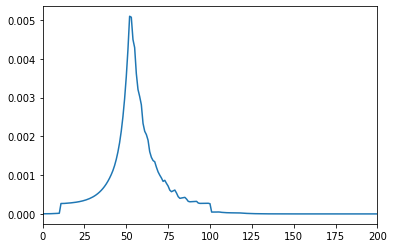

In [4]:
median['New Exposure'].plot(kind = 'line')

In [5]:
middle.columns

Index(['Susceptible: 0-20', 'Exposed: 0-20', 'Infected (symptomatic): 0-20',
       'Asymptomatically Infected: 0-20', 'Recovered: 0-20',
       'Hospitalised: 0-20', 'Critical: 0-20', 'Deaths: 0-20',
       'Susceptible: 20-40', 'Exposed: 20-40', 'Infected (symptomatic): 20-40',
       'Asymptomatically Infected: 20-40', 'Recovered: 20-40',
       'Hospitalised: 20-40', 'Critical: 20-40', 'Deaths: 20-40',
       'Susceptible: 40+', 'Exposed: 40+', 'Infected (symptomatic): 40+',
       'Asymptomatically Infected: 40+', 'Recovered: 40+', 'Hospitalised: 40+',
       'Critical: 40+', 'Deaths: 40+', 'Time', 'Susceptible', 'Exposed',
       'Infected (symptomatic)', 'Asymptomatically Infected', 'Recovered',
       'Hospitalised', 'Critical', 'Deaths', 'New Exposure', 'New Deaths'],
      dtype='object')

In [6]:
multiple_deaths = pd.melt(middle, id_vars = ['Time'], value_vars = ['Deaths: 0-20', 
                                                                    'Deaths: 20-40', 
                                                                    'Deaths: 40+',
                                                                    ])

In [7]:
multiple_hospitalised = pd.melt(middle, id_vars = ['Time'], value_vars = [
                                                                    'Hospitalised: 0-20',
                                                                    'Hospitalised: 20-40',
                                                                    'Hospitalised: 40+',
                                                                         ])

In [8]:
multiple_infected = pd.melt(middle, id_vars = ['Time'], value_vars = ['Exposed: 0-20', 
                                                                    'Exposed: 20-40', 
                                                                    'Exposed: 40+',
                                                                    ])

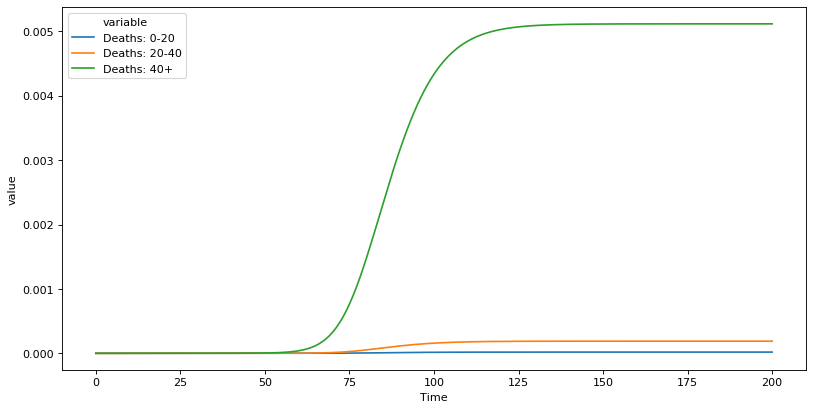

In [9]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_deaths, hue = 'variable')

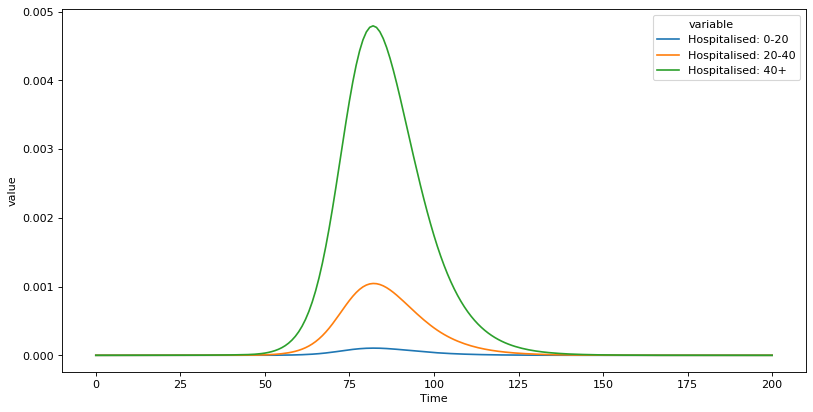

In [10]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_hospitalised, hue = 'variable')

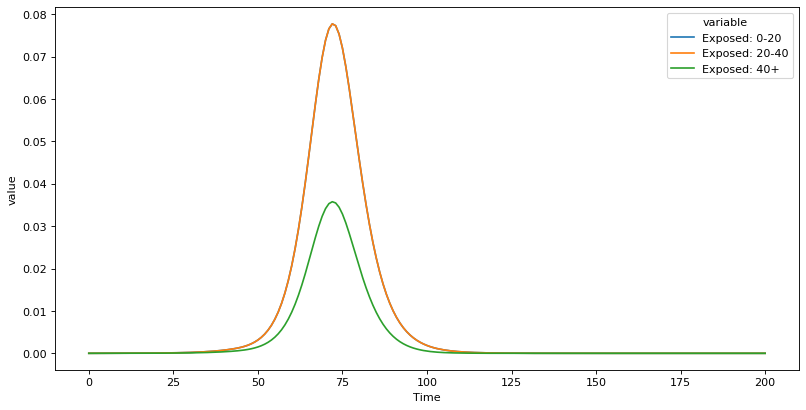

In [11]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_infected, hue = 'variable')

In [12]:
middle['Exposed_0_20_diff'] = middle['Exposed: 0-20'].diff().fillna(0)
middle['Exposed_20_40_diff'] = middle['Exposed: 20-40'].diff().fillna(0)
middle['Exposed_40_diff'] = middle['Exposed: 40+'].diff().fillna(0)
middle['Hospitalised_0_20_diff'] = middle['Hospitalised: 0-20'].diff().fillna(0)
middle['Hospitalised_20_40_diff'] = middle['Hospitalised: 20-40'].diff().fillna(0)
middle['Hospitalised_40_diff'] = middle['Hospitalised: 40+'].diff().fillna(0)
middle['Deaths_0_20_diff'] = middle['Deaths: 0-20'].diff().fillna(0)
middle['Deaths_20_40_diff'] = middle['Deaths: 20-40'].diff().fillna(0)
middle['Deaths_40_diff'] = middle['Deaths: 40+'].diff().fillna(0)

In [13]:
middle.head()

,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,Exposed: 20-40,...,New Deaths,Exposed_0_20_diff,Exposed_20_40_diff,Exposed_40_diff,Hospitalised_0_20_diff,Hospitalised_20_40_diff,Hospitalised_40_diff,Deaths_0_20_diff,Deaths_20_40_diff,Deaths_40_diff
0,0.399999,0.000000,1.000000e-06,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.399999,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.399998,0.000001,9.006020e-07,9.006020e-07,3.736420e-07,3.511826e-10,9.688126e-13,1.717739e-13,0.399998,0.000001,...,5.342167e-11,1.320772e-06,1.320772e-06,6.603862e-07,3.511826e-10,3.511826e-09,1.755913e-08,1.717739e-13,1.717739e-12,5.153216e-11
2,0.399996,0.000002,9.473695e-07,9.473695e-07,7.390805e-07,6.539132e-10,3.128608e-12,1.162667e-12,0.399996,0.000002,...,3.081677e-10,1.003686e-06,1.003686e-06,5.018431e-07,3.027306e-10,3.027306e-09,1.513653e-08,9.908930e-13,9.908930e-12,2.972679e-10
3,0.399994,0.000003,1.093054e-06,1.093054e-06,1.143987e-06,9.585613e-10,5.916730e-12,3.402925e-12,0.399994,0.000003,...,6.967203e-10,9.242584e-07,9.242584e-07,4.621292e-07,3.046481e-10,3.046481e-09,1.523241e-08,2.240258e-12,2.240258e-11,6.720775e-10
4,0.399993,0.000004,1.319628e-06,1.319628e-06,1.623582e-06,1.297973e-09,9.187397e-12,7.158795e-12,0.399993,0.000004,...,1.168076e-09,9.866490e-07,9.866490e-07,4.933245e-07,3.394116e-10,3.394116e-09,1.697058e-08,3.755870e-12,3.755870e-11,1.126761e-09


In [14]:
multiple_deaths_diff = pd.melt(middle, id_vars = ['Time'], value_vars = ['Deaths_0_20_diff', 
                                                                    'Deaths_20_40_diff', 
                                                                    'Deaths_40_diff',
                                                                    ])

In [15]:
multiple_hospitalised_diff = pd.melt(middle, id_vars = ['Time'], value_vars = [
                                                                    'Hospitalised_0_20_diff',
                                                                    'Hospitalised_20_40_diff',
                                                                    'Hospitalised_40_diff',
                                                                         ])

In [16]:
multiple_infected_diff = pd.melt(middle, id_vars = ['Time'], value_vars = ['Exposed_0_20_diff', 
                                                                    'Exposed_20_40_diff', 
                                                                    'Exposed_40_diff',
                                                                    ])

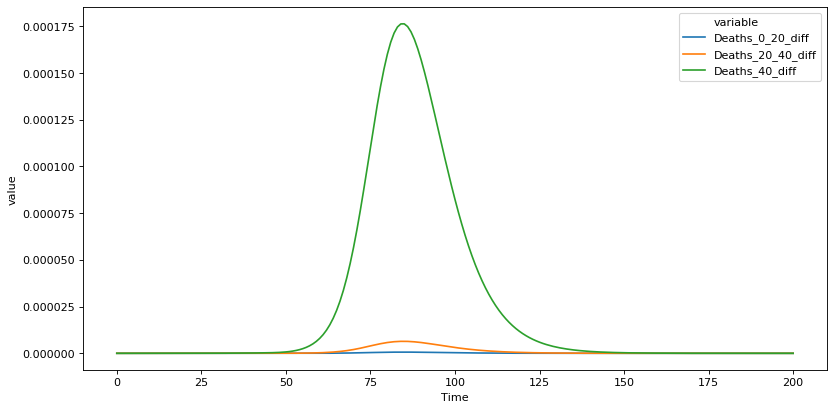

In [17]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_deaths_diff, hue = 'variable')

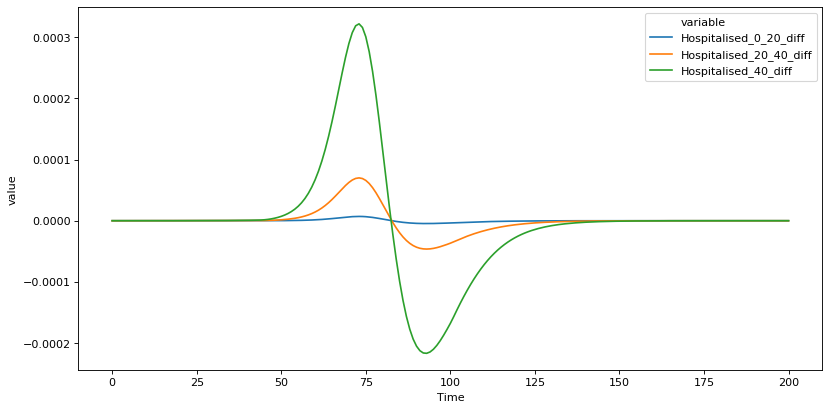

In [18]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_hospitalised_diff, hue = 'variable')

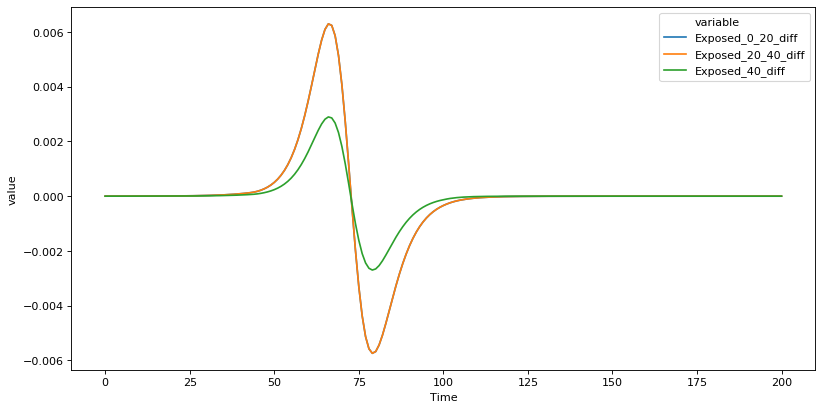

In [19]:
figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.lineplot(x = 'Time', y = 'value', data = multiple_infected_diff, hue = 'variable')

In [31]:
baseline=pd.read_csv('Baseline.csv')
baseline.drop('Unnamed: 0', axis = 1)

In [32]:
baseline.head()

,Unnamed: 0,Susceptible: 0-20,Exposed: 0-20,Infected (symptomatic): 0-20,Asymptomatically Infected: 0-20,Recovered: 0-20,Hospitalised: 0-20,Critical: 0-20,Deaths: 0-20,Susceptible: 20-40,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,New Exposure,New Deaths,R0
0,0,0.399980,0.000000,0.000020,0.000020,0.000000,0.000000,0.000000e+00,0.000000,0.399980,...,0.000000,0.000050,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
128,128,0.142555,0.005549,0.004932,0.004932,0.242016,0.000024,3.270800e-07,0.000011,0.071945,...,0.011955,0.010921,0.010921,0.644883,0.001208,0.000133,0.004166,0.002241,0.000068,2.0
129,129,0.141570,0.005192,0.004646,0.004646,0.243932,0.000023,3.140568e-07,0.000011,0.071247,...,0.011152,0.010249,0.010249,0.649109,0.001155,0.000128,0.004231,0.002085,0.000065,2.0
130,130,0.140652,0.004855,0.004372,0.004372,0.245736,0.000022,3.011321e-07,0.000011,0.070601,...,0.010400,0.009610,0.009610,0.653074,0.001103,0.000123,0.004293,0.001940,0.000063,2.0
131,131,0.139796,0.004537,0.004111,0.004111,0.247433,0.000021,2.883538e-07,0.000011,0.070002,...,0.009693,0.009004,0.009004,0.656791,0.001052,0.000118,0.004354,0.001804,0.000060,2.0


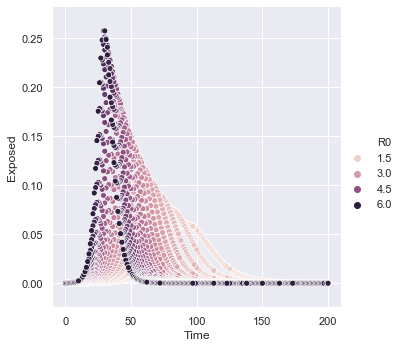

In [60]:
#Use this one

sns.relplot(x="Time", y="Exposed",
            hue="R0", data=baseline)

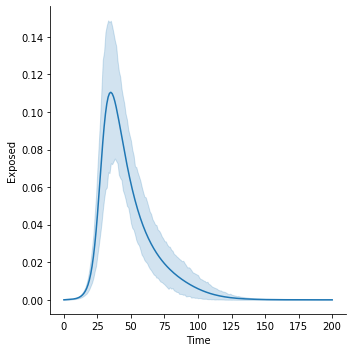

In [15]:
#Do not use this one

sns.relplot(x="Time", y="Exposed", kind="line", data=baseline)

/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


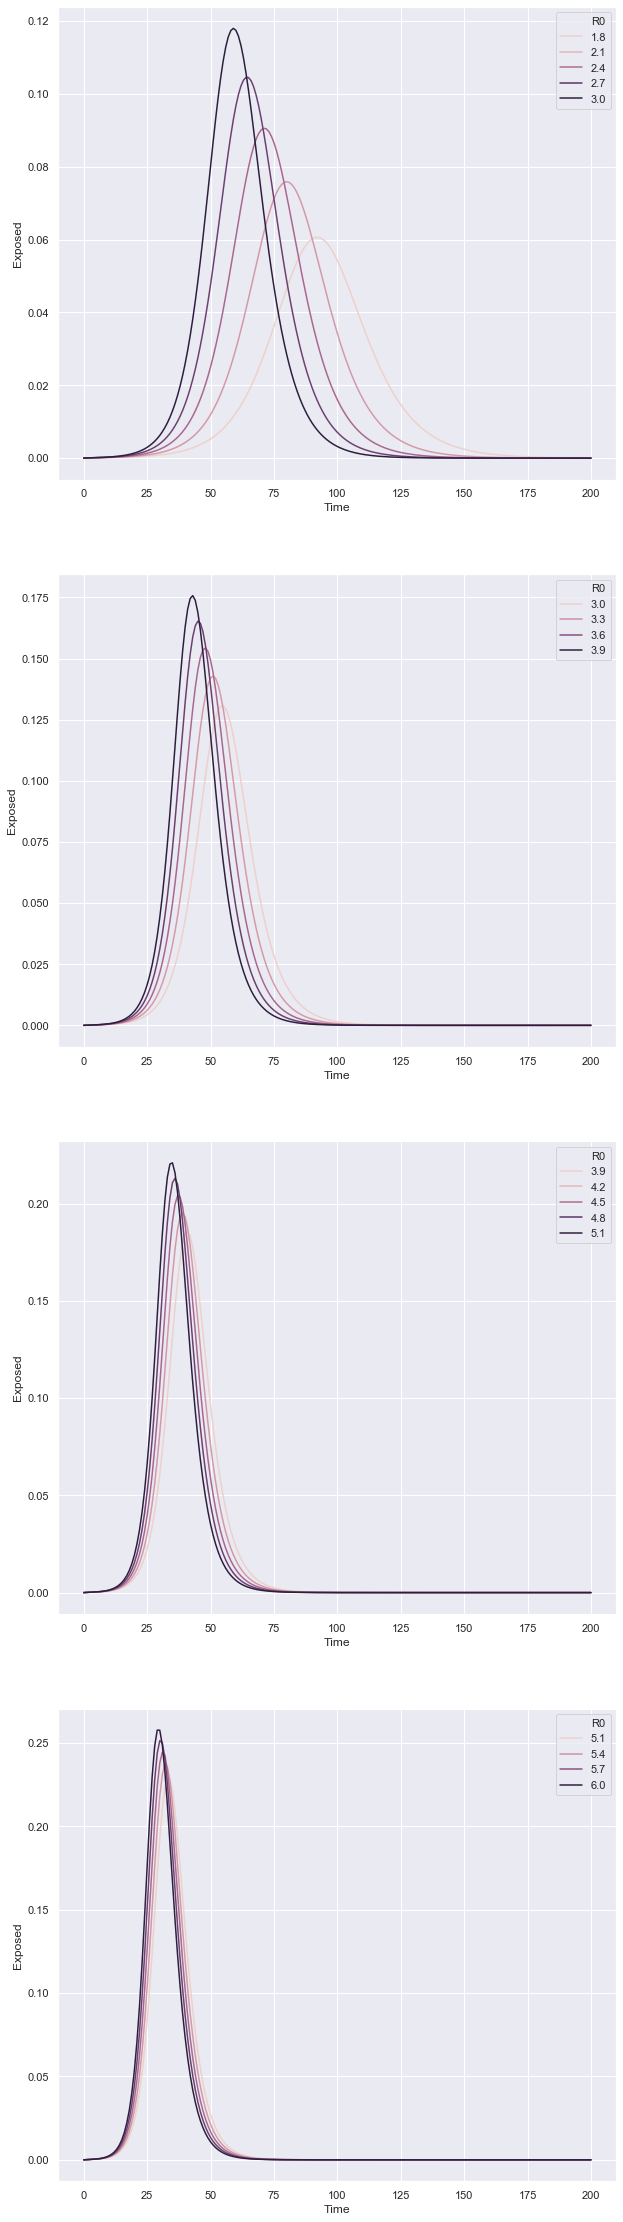

In [59]:
fig, ax =plt.subplots(4,1,figsize=(10,40))

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 < 3],ax=ax[0])

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 3][baseline.R0 < 4],ax=ax[1])

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 4][baseline.R0 < 5],ax=ax[2]);

sns.lineplot(x="Time", y="Exposed",
            hue="R0", data=baseline[baseline.R0 >= 5],ax=ax[3]);

# legend = ax.legend()
# legend.texts[0].set_text("Basic reproduction number")
# handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=handles[1:], labels=labels[1:])

fig.show()

In [57]:
ax[0].legend()

/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/billyzhaoyh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


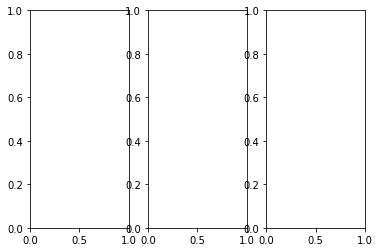

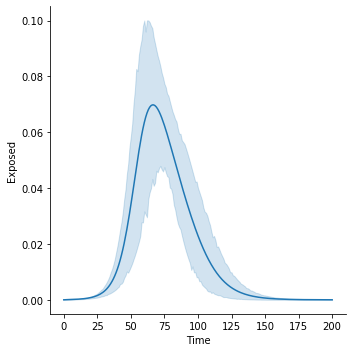

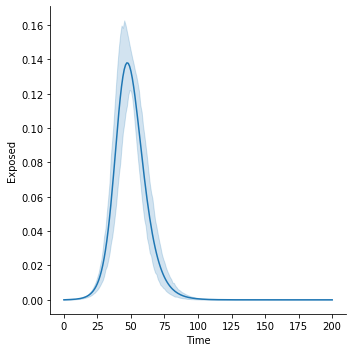

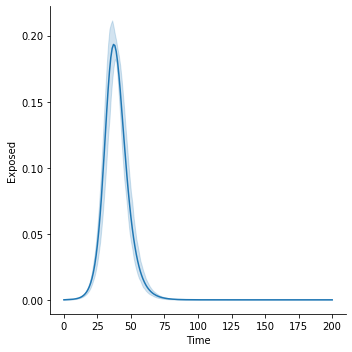

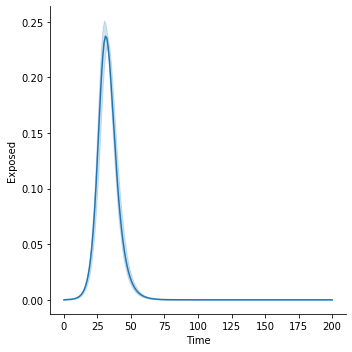

In [24]:
fig, ax =plt.subplots(1,3)

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 < 3])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 3][baseline.R0 < 4])

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 4][baseline.R0 < 5]);

sns.relplot(x="Time", y="Exposed",
             kind="line", data=baseline[baseline.R0 >= 5]);

fig.show()

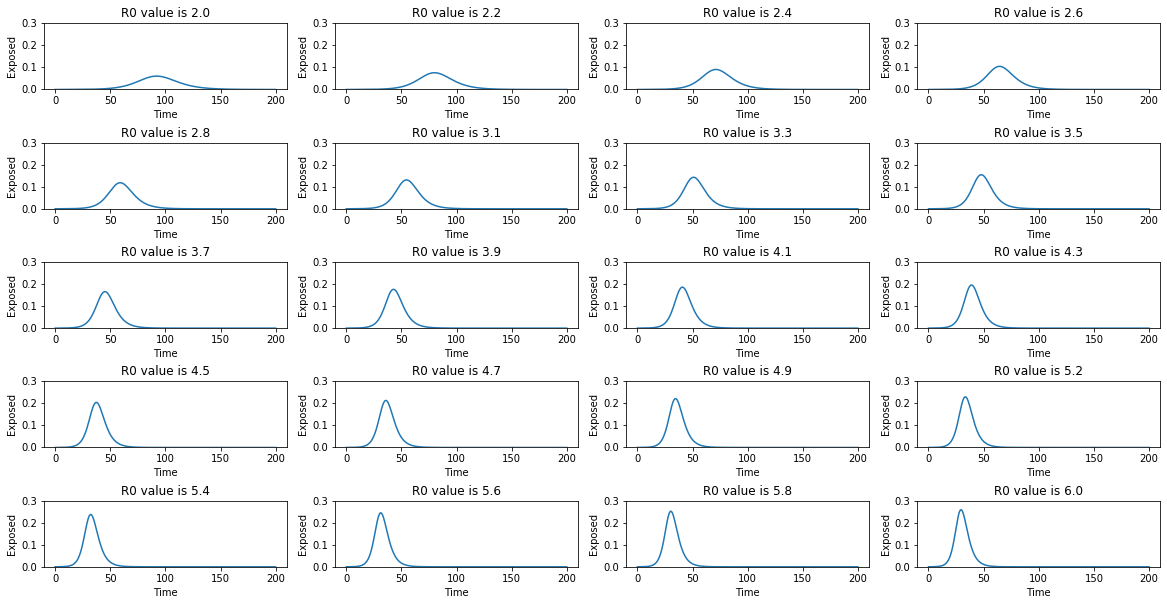

In [39]:
fig, ax =plt.subplots(5,4, figsize = (20,10))
fig.subplots_adjust(hspace=.8)
r0_vals = list(set(baseline.R0))
ylim=[0,0.3]
for r0_val, axis in zip(sorted(r0_vals), ax.flatten()):
    sns.lineplot(x="Time", y="Exposed",
            data=baseline[baseline.R0 == r0_val], ax = axis)
    axis.set_ylim(ylim)
    axis.title.set_text(f'R0 value is {round(r0_val,1)}')